In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#1. Load data
iris = load_iris()

# Find out what iris data looks like using ChatGPT
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.target
#df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(df.head())

X = iris.data[:, :2] #petal length, width only
y = (iris.target == 0).astype(int) #Setosa(1) vs Other(0) binary classification
# Boolean array where True if target value is 0 (Setosa), False if otherwise

y2 = iris.target

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
#2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

In [ ]:
#3. Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model2.fit(X2_train, y2_train)

print(model2.coef_)
print(model2.intercept_)

print(X2_test.shape)
print(X2_test[0].shape)
X3_test = X2_test[0].reshape(1,-1) # Same as doing [X2_test[0]]
print(X3_test.shape)
print(model2.predict_proba([X2_test[0]]))

[[-3.19170994  2.86120242]]
[8.30757207]
[[-2.50280394  2.16157087]
 [ 0.62272951 -1.44206518]
 [ 1.88007444 -0.71950568]]
[ 7.18105479  1.37277873 -8.55383352]
(30, 2)
(2,)
(1, 2)
[[0.02296768 0.5453268  0.43170551]]


In [5]:
#4. Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n Accuracy: {acc * 100:.2f}%")

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

y2_pred = model2.predict(X2_test)
acc = accuracy_score(y2_test, y2_pred)
print(f"\n Accuracy: {acc * 100:.2f}%")

print("\n Confusion Matrix:")
print(confusion_matrix(y2_test, y2_pred))

print("\n Classification Report:")
print(classification_report(y2_test, y2_pred))


 Accuracy: 100.00%

 Confusion Matrix:
[[22  0]
 [ 0  8]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


 Accuracy: 90.00%

 Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



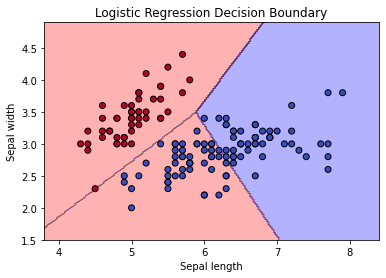

In [6]:
#5. Visualization
import numpy as np

x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

colors = ['red', 'blue', 'green']

plt.contourf(xx, yy, Z, alpha=0.3, colors=colors)
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Logistic Regression Decision Boundary')
plt.show()